# Keras - Dense neural network

bla

#### Importere biblioteker

In [1]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt

# Making plots look better (Jupyter Notebook spesific)
import matplotlib as mpl
mpl.rcParams['patch.force_edgecolor'] = True

# Built in jupyter notebook commands
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#### Importere datasett

In [2]:
data_raw = pd.read_csv('data_valsneset_simple.csv',sep =';', low_memory = False)

data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5237 entries, 0 to 5236
Data columns (total 4 columns):
VALS-Valsneset..-GS1-5-T4015A3 -0104    5237 non-null float64
STORM-Vals-Vindhast-25km                5237 non-null float64
STORM-Vals-Vindretn-25km                5237 non-null int64
Target                                  5237 non-null float64
dtypes: float64(3), int64(1)
memory usage: 163.7 KB


In [3]:
data = data_raw.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5237 entries, 0 to 5236
Data columns (total 4 columns):
VALS-Valsneset..-GS1-5-T4015A3 -0104    5237 non-null float64
STORM-Vals-Vindhast-25km                5237 non-null float64
STORM-Vals-Vindretn-25km                5237 non-null int64
Target                                  5237 non-null float64
dtypes: float64(3), int64(1)
memory usage: 204.6 KB


In [4]:
num_features = len(data.columns) -1
print(num_features)

3


#### Konvertere til numpy-arrays

In [5]:
# Konverterer pandas.DataFrame til en numpy array
all_features_and_target_value = data.values.astype("float32")

# Trekker ut alle features (5 aromepunkter med 4 features + delayed = 21 features)
x = all_features_and_target_value[:,0:num_features]

# Trekker ut produksjonen som y-verdi
y = all_features_and_target_value[:,num_features]

#### Skalere data

In [6]:
from sklearn.preprocessing import MinMaxScaler

# Lage en scaler
scaler = MinMaxScaler()

# Anvende på features, her lagret i variablen x.
x = scaler.fit_transform(x)

#### Train/test Split

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 67)

# Keras

In [8]:
import tensorflow as tf

#### Importere modellen

In [9]:
from tensorflow.contrib.keras import models

In [10]:
dnn_keras_model = models.Sequential()

#### Sette opp layers

In [11]:
from tensorflow.contrib.keras import layers

In [12]:
# Input layer
dnn_keras_model.add(layers.Dense(units=64, input_dim= num_features, activation='relu'))

In [13]:
'''Hidden Layers'''

dnn_keras_model.add(layers.Dense(units=32,activation='relu'))

dnn_keras_model.add(layers.Dense(units=16,activation='relu'))

dnn_keras_model.add(layers.Dense(units=8,activation='relu'))

dnn_keras_model.add(layers.Dense(units=2,activation='relu'))


In [14]:
# Output Layer
dnn_keras_model.add(layers.Dense(1))

#### Kompilere modellen

In [15]:
from tensorflow.contrib.keras import losses,optimizers,metrics,activations

In [16]:
#Kompilere - Alternative lossfunctions: mean_squared_error
dnn_keras_model.compile(optimizer='adam', loss = 'mean_absolute_error')

#### Trene modellen

In [17]:
from tensorflow.contrib.keras import losses,optimizers,metrics,activations

#### Callbacks og checkpoints

In [18]:
from tensorflow.contrib.keras import callbacks

In [19]:
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=500)

checkpoint = callbacks.ModelCheckpoint('checkpoint_model_simple.h5', monitor = 'val_loss', 
                                       verbose = 1, save_best_only= True, mode= 'min')

In [20]:
# Trene modellen
np.random.seed(7)
dnn_keras_model.fit(X_train,y_train, epochs = 10000, batch_size=100, verbose=2, validation_data=(X_test, y_test),
                   callbacks=[checkpoint,early_stopping])


# validation_split=0.20
#validation_data=(X_test, y_test)

Train on 3665 samples, validate on 1572 samples
Epoch 1/10000
Epoch 00000: val_loss improved from inf to 4.00508, saving model to checkpoint_model_simple.h5
0s - loss: 4.1900 - val_loss: 4.0051
Epoch 2/10000
Epoch 00001: val_loss improved from 4.00508 to 2.85170, saving model to checkpoint_model_simple.h5
0s - loss: 3.4315 - val_loss: 2.8517
Epoch 3/10000
Epoch 00002: val_loss improved from 2.85170 to 2.08301, saving model to checkpoint_model_simple.h5
0s - loss: 2.4353 - val_loss: 2.0830
Epoch 4/10000
Epoch 00003: val_loss improved from 2.08301 to 1.21811, saving model to checkpoint_model_simple.h5
0s - loss: 1.5638 - val_loss: 1.2181
Epoch 5/10000
Epoch 00004: val_loss improved from 1.21811 to 1.20971, saving model to checkpoint_model_simple.h5
0s - loss: 1.1858 - val_loss: 1.2097
Epoch 6/10000
Epoch 00005: val_loss improved from 1.20971 to 1.20845, saving model to checkpoint_model_simple.h5
0s - loss: 1.1694 - val_loss: 1.2084
Epoch 7/10000
Epoch 00006: val_loss improved from 1.2084

Epoch 00068: val_loss improved from 1.15018 to 1.14907, saving model to checkpoint_model_simple.h5
0s - loss: 1.1034 - val_loss: 1.1491
Epoch 70/10000
Epoch 00069: val_loss did not improve
0s - loss: 1.1037 - val_loss: 1.1645
Epoch 71/10000
Epoch 00070: val_loss improved from 1.14907 to 1.14833, saving model to checkpoint_model_simple.h5
0s - loss: 1.1105 - val_loss: 1.1483
Epoch 72/10000
Epoch 00071: val_loss improved from 1.14833 to 1.14809, saving model to checkpoint_model_simple.h5
0s - loss: 1.1030 - val_loss: 1.1481
Epoch 73/10000
Epoch 00072: val_loss improved from 1.14809 to 1.14654, saving model to checkpoint_model_simple.h5
0s - loss: 1.1004 - val_loss: 1.1465
Epoch 74/10000
Epoch 00073: val_loss did not improve
0s - loss: 1.1023 - val_loss: 1.1481
Epoch 75/10000
Epoch 00074: val_loss improved from 1.14654 to 1.14439, saving model to checkpoint_model_simple.h5
0s - loss: 1.1081 - val_loss: 1.1444
Epoch 76/10000
Epoch 00075: val_loss improved from 1.14439 to 1.14295, saving mo

Epoch 00146: val_loss did not improve
0s - loss: 1.0714 - val_loss: 1.1271
Epoch 148/10000
Epoch 00147: val_loss did not improve
0s - loss: 1.0738 - val_loss: 1.1408
Epoch 149/10000
Epoch 00148: val_loss did not improve
0s - loss: 1.0740 - val_loss: 1.1310
Epoch 150/10000
Epoch 00149: val_loss did not improve
0s - loss: 1.0714 - val_loss: 1.1313
Epoch 151/10000
Epoch 00150: val_loss did not improve
0s - loss: 1.0729 - val_loss: 1.1295
Epoch 152/10000
Epoch 00151: val_loss did not improve
0s - loss: 1.0720 - val_loss: 1.1353
Epoch 153/10000
Epoch 00152: val_loss improved from 1.12532 to 1.12526, saving model to checkpoint_model_simple.h5
0s - loss: 1.0730 - val_loss: 1.1253
Epoch 154/10000
Epoch 00153: val_loss did not improve
0s - loss: 1.0737 - val_loss: 1.1302
Epoch 155/10000
Epoch 00154: val_loss improved from 1.12526 to 1.12507, saving model to checkpoint_model_simple.h5
0s - loss: 1.0774 - val_loss: 1.1251
Epoch 156/10000
Epoch 00155: val_loss did not improve
0s - loss: 1.0748 - v

Epoch 00234: val_loss did not improve
0s - loss: 1.0581 - val_loss: 1.1190
Epoch 236/10000
Epoch 00235: val_loss did not improve
0s - loss: 1.0581 - val_loss: 1.1225
Epoch 237/10000
Epoch 00236: val_loss did not improve
0s - loss: 1.0623 - val_loss: 1.1289
Epoch 238/10000
Epoch 00237: val_loss did not improve
0s - loss: 1.0634 - val_loss: 1.1522
Epoch 239/10000
Epoch 00238: val_loss did not improve
0s - loss: 1.0697 - val_loss: 1.1229
Epoch 240/10000
Epoch 00239: val_loss did not improve
0s - loss: 1.0589 - val_loss: 1.1192
Epoch 241/10000
Epoch 00240: val_loss improved from 1.11887 to 1.11738, saving model to checkpoint_model_simple.h5
0s - loss: 1.0598 - val_loss: 1.1174
Epoch 242/10000
Epoch 00241: val_loss improved from 1.11738 to 1.11737, saving model to checkpoint_model_simple.h5
0s - loss: 1.0604 - val_loss: 1.1174
Epoch 243/10000
Epoch 00242: val_loss did not improve
0s - loss: 1.0606 - val_loss: 1.1255
Epoch 244/10000
Epoch 00243: val_loss did not improve
0s - loss: 1.0642 - v

Epoch 00324: val_loss did not improve
0s - loss: 1.0537 - val_loss: 1.1184
Epoch 326/10000
Epoch 00325: val_loss did not improve
0s - loss: 1.0525 - val_loss: 1.1185
Epoch 327/10000
Epoch 00326: val_loss did not improve
0s - loss: 1.0567 - val_loss: 1.1206
Epoch 328/10000
Epoch 00327: val_loss did not improve
0s - loss: 1.0530 - val_loss: 1.1200
Epoch 329/10000
Epoch 00328: val_loss did not improve
0s - loss: 1.0562 - val_loss: 1.1199
Epoch 330/10000
Epoch 00329: val_loss improved from 1.11619 to 1.11569, saving model to checkpoint_model_simple.h5
0s - loss: 1.0518 - val_loss: 1.1157
Epoch 331/10000
Epoch 00330: val_loss did not improve
0s - loss: 1.0509 - val_loss: 1.1182
Epoch 332/10000
Epoch 00331: val_loss improved from 1.11569 to 1.11561, saving model to checkpoint_model_simple.h5
0s - loss: 1.0574 - val_loss: 1.1156
Epoch 333/10000
Epoch 00332: val_loss did not improve
0s - loss: 1.0526 - val_loss: 1.1167
Epoch 334/10000
Epoch 00333: val_loss did not improve
0s - loss: 1.0545 - v

Epoch 00412: val_loss did not improve
0s - loss: 1.0517 - val_loss: 1.1211
Epoch 414/10000
Epoch 00413: val_loss did not improve
0s - loss: 1.0500 - val_loss: 1.1184
Epoch 415/10000
Epoch 00414: val_loss did not improve
0s - loss: 1.0473 - val_loss: 1.1159
Epoch 416/10000
Epoch 00415: val_loss did not improve
0s - loss: 1.0517 - val_loss: 1.1769
Epoch 417/10000
Epoch 00416: val_loss did not improve
0s - loss: 1.0799 - val_loss: 1.1213
Epoch 418/10000
Epoch 00417: val_loss did not improve
0s - loss: 1.0532 - val_loss: 1.1175
Epoch 419/10000
Epoch 00418: val_loss did not improve
0s - loss: 1.0486 - val_loss: 1.1163
Epoch 420/10000
Epoch 00419: val_loss did not improve
0s - loss: 1.0457 - val_loss: 1.1179
Epoch 421/10000
Epoch 00420: val_loss did not improve
0s - loss: 1.0493 - val_loss: 1.1152
Epoch 422/10000
Epoch 00421: val_loss did not improve
0s - loss: 1.0485 - val_loss: 1.1228
Epoch 423/10000
Epoch 00422: val_loss did not improve
0s - loss: 1.0488 - val_loss: 1.1208
Epoch 424/10000

Epoch 00504: val_loss did not improve
0s - loss: 1.0486 - val_loss: 1.1205
Epoch 506/10000
Epoch 00505: val_loss did not improve
0s - loss: 1.0431 - val_loss: 1.1177
Epoch 507/10000
Epoch 00506: val_loss did not improve
0s - loss: 1.0416 - val_loss: 1.1225
Epoch 508/10000
Epoch 00507: val_loss did not improve
0s - loss: 1.0449 - val_loss: 1.1174
Epoch 509/10000
Epoch 00508: val_loss improved from 1.11366 to 1.11359, saving model to checkpoint_model_simple.h5
0s - loss: 1.0423 - val_loss: 1.1136
Epoch 510/10000
Epoch 00509: val_loss did not improve
0s - loss: 1.0433 - val_loss: 1.1177
Epoch 511/10000
Epoch 00510: val_loss did not improve
0s - loss: 1.0474 - val_loss: 1.1256
Epoch 512/10000
Epoch 00511: val_loss did not improve
0s - loss: 1.0454 - val_loss: 1.1155
Epoch 513/10000
Epoch 00512: val_loss did not improve
0s - loss: 1.0461 - val_loss: 1.1160
Epoch 514/10000
Epoch 00513: val_loss did not improve
0s - loss: 1.0432 - val_loss: 1.1184
Epoch 515/10000
Epoch 00514: val_loss did not

Epoch 00594: val_loss did not improve
0s - loss: 1.0450 - val_loss: 1.1166
Epoch 596/10000
Epoch 00595: val_loss did not improve
0s - loss: 1.0411 - val_loss: 1.1200
Epoch 597/10000
Epoch 00596: val_loss did not improve
0s - loss: 1.0384 - val_loss: 1.1156
Epoch 598/10000
Epoch 00597: val_loss did not improve
0s - loss: 1.0477 - val_loss: 1.1212
Epoch 599/10000
Epoch 00598: val_loss did not improve
0s - loss: 1.0514 - val_loss: 1.1231
Epoch 600/10000
Epoch 00599: val_loss did not improve
0s - loss: 1.0447 - val_loss: 1.1191
Epoch 601/10000
Epoch 00600: val_loss did not improve
0s - loss: 1.0419 - val_loss: 1.1318
Epoch 602/10000
Epoch 00601: val_loss did not improve
0s - loss: 1.0441 - val_loss: 1.1160
Epoch 603/10000
Epoch 00602: val_loss did not improve
0s - loss: 1.0397 - val_loss: 1.1165
Epoch 604/10000
Epoch 00603: val_loss did not improve
0s - loss: 1.0385 - val_loss: 1.1251
Epoch 605/10000
Epoch 00604: val_loss did not improve
0s - loss: 1.0425 - val_loss: 1.1179
Epoch 606/10000

Epoch 00687: val_loss did not improve
0s - loss: 1.0345 - val_loss: 1.1146
Epoch 689/10000
Epoch 00688: val_loss did not improve
0s - loss: 1.0373 - val_loss: 1.1190
Epoch 690/10000
Epoch 00689: val_loss did not improve
0s - loss: 1.0349 - val_loss: 1.1133
Epoch 691/10000
Epoch 00690: val_loss did not improve
0s - loss: 1.0395 - val_loss: 1.1294
Epoch 692/10000
Epoch 00691: val_loss did not improve
0s - loss: 1.0374 - val_loss: 1.1175
Epoch 693/10000
Epoch 00692: val_loss improved from 1.11317 to 1.11280, saving model to checkpoint_model_simple.h5
0s - loss: 1.0362 - val_loss: 1.1128
Epoch 694/10000
Epoch 00693: val_loss did not improve
0s - loss: 1.0387 - val_loss: 1.1152
Epoch 695/10000
Epoch 00694: val_loss did not improve
0s - loss: 1.0474 - val_loss: 1.1181
Epoch 696/10000
Epoch 00695: val_loss did not improve
0s - loss: 1.0420 - val_loss: 1.1308
Epoch 697/10000
Epoch 00696: val_loss did not improve
0s - loss: 1.0400 - val_loss: 1.1192
Epoch 698/10000
Epoch 00697: val_loss improve

Epoch 00776: val_loss did not improve
0s - loss: 1.0341 - val_loss: 1.1138
Epoch 778/10000
Epoch 00777: val_loss did not improve
0s - loss: 1.0340 - val_loss: 1.1194
Epoch 779/10000
Epoch 00778: val_loss did not improve
0s - loss: 1.0381 - val_loss: 1.1198
Epoch 780/10000
Epoch 00779: val_loss did not improve
0s - loss: 1.0345 - val_loss: 1.1260
Epoch 781/10000
Epoch 00780: val_loss improved from 1.11164 to 1.11116, saving model to checkpoint_model_simple.h5
0s - loss: 1.0396 - val_loss: 1.1112
Epoch 782/10000
Epoch 00781: val_loss did not improve
0s - loss: 1.0302 - val_loss: 1.1132
Epoch 783/10000
Epoch 00782: val_loss did not improve
0s - loss: 1.0326 - val_loss: 1.1207
Epoch 784/10000
Epoch 00783: val_loss did not improve
0s - loss: 1.0339 - val_loss: 1.1155
Epoch 785/10000
Epoch 00784: val_loss improved from 1.11116 to 1.11086, saving model to checkpoint_model_simple.h5
0s - loss: 1.0325 - val_loss: 1.1109
Epoch 786/10000
Epoch 00785: val_loss did not improve
0s - loss: 1.0340 - v

Epoch 00865: val_loss did not improve
0s - loss: 1.0310 - val_loss: 1.1215
Epoch 867/10000
Epoch 00866: val_loss did not improve
0s - loss: 1.0350 - val_loss: 1.1191
Epoch 868/10000
Epoch 00867: val_loss did not improve
0s - loss: 1.0294 - val_loss: 1.1143
Epoch 869/10000
Epoch 00868: val_loss did not improve
0s - loss: 1.0304 - val_loss: 1.1205
Epoch 870/10000
Epoch 00869: val_loss did not improve
0s - loss: 1.0305 - val_loss: 1.1158
Epoch 871/10000
Epoch 00870: val_loss did not improve
0s - loss: 1.0288 - val_loss: 1.1155
Epoch 872/10000
Epoch 00871: val_loss did not improve
0s - loss: 1.0292 - val_loss: 1.1223
Epoch 873/10000
Epoch 00872: val_loss did not improve
0s - loss: 1.0315 - val_loss: 1.1178
Epoch 874/10000
Epoch 00873: val_loss did not improve
0s - loss: 1.0275 - val_loss: 1.1161
Epoch 875/10000
Epoch 00874: val_loss did not improve
0s - loss: 1.0272 - val_loss: 1.1146
Epoch 876/10000
Epoch 00875: val_loss did not improve
0s - loss: 1.0341 - val_loss: 1.1246
Epoch 877/10000

Epoch 00956: val_loss did not improve
0s - loss: 1.0299 - val_loss: 1.1188
Epoch 958/10000
Epoch 00957: val_loss did not improve
0s - loss: 1.0290 - val_loss: 1.1130
Epoch 959/10000
Epoch 00958: val_loss did not improve
0s - loss: 1.0286 - val_loss: 1.1159
Epoch 960/10000
Epoch 00959: val_loss did not improve
0s - loss: 1.0269 - val_loss: 1.1172
Epoch 961/10000
Epoch 00960: val_loss did not improve
0s - loss: 1.0284 - val_loss: 1.1175
Epoch 962/10000
Epoch 00961: val_loss did not improve
0s - loss: 1.0235 - val_loss: 1.1216
Epoch 963/10000
Epoch 00962: val_loss did not improve
0s - loss: 1.0323 - val_loss: 1.1175
Epoch 964/10000
Epoch 00963: val_loss did not improve
0s - loss: 1.0343 - val_loss: 1.1152
Epoch 965/10000
Epoch 00964: val_loss did not improve
0s - loss: 1.0282 - val_loss: 1.1176
Epoch 966/10000
Epoch 00965: val_loss did not improve
0s - loss: 1.0245 - val_loss: 1.1151
Epoch 967/10000
Epoch 00966: val_loss did not improve
0s - loss: 1.0307 - val_loss: 1.1221
Epoch 968/10000

Epoch 01045: val_loss did not improve
0s - loss: 1.0246 - val_loss: 1.1160
Epoch 1047/10000
Epoch 01046: val_loss did not improve
0s - loss: 1.0211 - val_loss: 1.1160
Epoch 1048/10000
Epoch 01047: val_loss did not improve
0s - loss: 1.0249 - val_loss: 1.1490
Epoch 1049/10000
Epoch 01048: val_loss did not improve
0s - loss: 1.0310 - val_loss: 1.1124
Epoch 1050/10000
Epoch 01049: val_loss did not improve
0s - loss: 1.0214 - val_loss: 1.1127
Epoch 1051/10000
Epoch 01050: val_loss did not improve
0s - loss: 1.0245 - val_loss: 1.1125
Epoch 1052/10000
Epoch 01051: val_loss did not improve
0s - loss: 1.0272 - val_loss: 1.1143
Epoch 1053/10000
Epoch 01052: val_loss did not improve
0s - loss: 1.0222 - val_loss: 1.1152
Epoch 1054/10000
Epoch 01053: val_loss did not improve
0s - loss: 1.0216 - val_loss: 1.1185
Epoch 1055/10000
Epoch 01054: val_loss did not improve
0s - loss: 1.0243 - val_loss: 1.1216
Epoch 1056/10000
Epoch 01055: val_loss did not improve
0s - loss: 1.0242 - val_loss: 1.1111
Epoch

Epoch 01137: val_loss did not improve
0s - loss: 1.0209 - val_loss: 1.1115
Epoch 1139/10000
Epoch 01138: val_loss did not improve
0s - loss: 1.0232 - val_loss: 1.1230
Epoch 1140/10000
Epoch 01139: val_loss did not improve
0s - loss: 1.0226 - val_loss: 1.1240
Epoch 1141/10000
Epoch 01140: val_loss did not improve
0s - loss: 1.0191 - val_loss: 1.1167
Epoch 1142/10000
Epoch 01141: val_loss did not improve
0s - loss: 1.0184 - val_loss: 1.1114
Epoch 1143/10000
Epoch 01142: val_loss did not improve
0s - loss: 1.0194 - val_loss: 1.1163
Epoch 1144/10000
Epoch 01143: val_loss did not improve
0s - loss: 1.0198 - val_loss: 1.1172
Epoch 1145/10000
Epoch 01144: val_loss did not improve
0s - loss: 1.0216 - val_loss: 1.1366
Epoch 1146/10000
Epoch 01145: val_loss did not improve
0s - loss: 1.0265 - val_loss: 1.1191
Epoch 1147/10000
Epoch 01146: val_loss did not improve
0s - loss: 1.0255 - val_loss: 1.1338
Epoch 1148/10000
Epoch 01147: val_loss did not improve
0s - loss: 1.0272 - val_loss: 1.1191
Epoch

Epoch 01230: val_loss did not improve
0s - loss: 1.0256 - val_loss: 1.1174
Epoch 1232/10000
Epoch 01231: val_loss did not improve
0s - loss: 1.0188 - val_loss: 1.1156
Epoch 1233/10000
Epoch 01232: val_loss did not improve
0s - loss: 1.0257 - val_loss: 1.1158
Epoch 1234/10000
Epoch 01233: val_loss did not improve
0s - loss: 1.0204 - val_loss: 1.1149
Epoch 1235/10000
Epoch 01234: val_loss did not improve
0s - loss: 1.0276 - val_loss: 1.1142
Epoch 1236/10000
Epoch 01235: val_loss did not improve
0s - loss: 1.0211 - val_loss: 1.1121
Epoch 1237/10000
Epoch 01236: val_loss did not improve
0s - loss: 1.0276 - val_loss: 1.1146
Epoch 1238/10000
Epoch 01237: val_loss improved from 1.10767 to 1.10740, saving model to checkpoint_model_simple.h5
0s - loss: 1.0175 - val_loss: 1.1074
Epoch 1239/10000
Epoch 01238: val_loss did not improve
0s - loss: 1.0163 - val_loss: 1.1156
Epoch 1240/10000
Epoch 01239: val_loss did not improve
0s - loss: 1.0214 - val_loss: 1.1176
Epoch 1241/10000
Epoch 01240: val_lo

Epoch 01319: val_loss did not improve
0s - loss: 1.0129 - val_loss: 1.1123
Epoch 1321/10000
Epoch 01320: val_loss did not improve
0s - loss: 1.0184 - val_loss: 1.1151
Epoch 1322/10000
Epoch 01321: val_loss did not improve
0s - loss: 1.0161 - val_loss: 1.1220
Epoch 1323/10000
Epoch 01322: val_loss did not improve
0s - loss: 1.0196 - val_loss: 1.1328
Epoch 1324/10000
Epoch 01323: val_loss did not improve
0s - loss: 1.0232 - val_loss: 1.1170
Epoch 1325/10000
Epoch 01324: val_loss did not improve
0s - loss: 1.0156 - val_loss: 1.1136
Epoch 1326/10000
Epoch 01325: val_loss did not improve
0s - loss: 1.0106 - val_loss: 1.1155
Epoch 1327/10000
Epoch 01326: val_loss did not improve
0s - loss: 1.0149 - val_loss: 1.1108
Epoch 1328/10000
Epoch 01327: val_loss did not improve
0s - loss: 1.0205 - val_loss: 1.1186
Epoch 1329/10000
Epoch 01328: val_loss did not improve
0s - loss: 1.0160 - val_loss: 1.1097
Epoch 1330/10000
Epoch 01329: val_loss did not improve
0s - loss: 1.0197 - val_loss: 1.1115
Epoch

Epoch 01411: val_loss did not improve
0s - loss: 1.0134 - val_loss: 1.1164
Epoch 1413/10000
Epoch 01412: val_loss did not improve
0s - loss: 1.0197 - val_loss: 1.1145
Epoch 1414/10000
Epoch 01413: val_loss did not improve
0s - loss: 1.0115 - val_loss: 1.1134
Epoch 1415/10000
Epoch 01414: val_loss did not improve
0s - loss: 1.0154 - val_loss: 1.1101
Epoch 1416/10000
Epoch 01415: val_loss did not improve
0s - loss: 1.0142 - val_loss: 1.1232
Epoch 1417/10000
Epoch 01416: val_loss did not improve
0s - loss: 1.0164 - val_loss: 1.1159
Epoch 1418/10000
Epoch 01417: val_loss did not improve
0s - loss: 1.0125 - val_loss: 1.1350
Epoch 1419/10000
Epoch 01418: val_loss did not improve
0s - loss: 1.0132 - val_loss: 1.1136
Epoch 1420/10000
Epoch 01419: val_loss did not improve
0s - loss: 1.0173 - val_loss: 1.1196
Epoch 1421/10000
Epoch 01420: val_loss did not improve
0s - loss: 1.0176 - val_loss: 1.1178
Epoch 1422/10000
Epoch 01421: val_loss did not improve
0s - loss: 1.0165 - val_loss: 1.1166
Epoch

Epoch 01503: val_loss did not improve
0s - loss: 1.0135 - val_loss: 1.1204
Epoch 1505/10000
Epoch 01504: val_loss did not improve
0s - loss: 1.0238 - val_loss: 1.1465
Epoch 1506/10000
Epoch 01505: val_loss did not improve
0s - loss: 1.0237 - val_loss: 1.1261
Epoch 1507/10000
Epoch 01506: val_loss did not improve
0s - loss: 1.0103 - val_loss: 1.1141
Epoch 1508/10000
Epoch 01507: val_loss did not improve
0s - loss: 1.0102 - val_loss: 1.1143
Epoch 1509/10000
Epoch 01508: val_loss did not improve
0s - loss: 1.0103 - val_loss: 1.1135
Epoch 1510/10000
Epoch 01509: val_loss did not improve
0s - loss: 1.0104 - val_loss: 1.1185
Epoch 1511/10000
Epoch 01510: val_loss did not improve
0s - loss: 1.0116 - val_loss: 1.1242
Epoch 1512/10000
Epoch 01511: val_loss did not improve
0s - loss: 1.0114 - val_loss: 1.1182
Epoch 1513/10000
Epoch 01512: val_loss did not improve
0s - loss: 1.0130 - val_loss: 1.1297
Epoch 1514/10000
Epoch 01513: val_loss did not improve
0s - loss: 1.0125 - val_loss: 1.1264
Epoch

Epoch 01595: val_loss did not improve
0s - loss: 1.0117 - val_loss: 1.1058
Epoch 1597/10000
Epoch 01596: val_loss did not improve
0s - loss: 1.0111 - val_loss: 1.1332
Epoch 1598/10000
Epoch 01597: val_loss did not improve
0s - loss: 1.0189 - val_loss: 1.1134
Epoch 1599/10000
Epoch 01598: val_loss did not improve
0s - loss: 1.0102 - val_loss: 1.1110
Epoch 1600/10000
Epoch 01599: val_loss did not improve
0s - loss: 1.0186 - val_loss: 1.1104
Epoch 1601/10000
Epoch 01600: val_loss did not improve
0s - loss: 1.0087 - val_loss: 1.1104
Epoch 1602/10000
Epoch 01601: val_loss did not improve
0s - loss: 1.0078 - val_loss: 1.1116
Epoch 1603/10000
Epoch 01602: val_loss did not improve
0s - loss: 1.0114 - val_loss: 1.1159
Epoch 1604/10000
Epoch 01603: val_loss did not improve
0s - loss: 1.0063 - val_loss: 1.1199
Epoch 1605/10000
Epoch 01604: val_loss did not improve
0s - loss: 1.0062 - val_loss: 1.1092
Epoch 1606/10000
Epoch 01605: val_loss did not improve
0s - loss: 1.0075 - val_loss: 1.1225
Epoch

Epoch 01687: val_loss did not improve
0s - loss: 1.0044 - val_loss: 1.1073
Epoch 1689/10000
Epoch 01688: val_loss did not improve
0s - loss: 1.0088 - val_loss: 1.1106
Epoch 1690/10000
Epoch 01689: val_loss did not improve
0s - loss: 1.0061 - val_loss: 1.1094
Epoch 1691/10000
Epoch 01690: val_loss did not improve
0s - loss: 1.0080 - val_loss: 1.1202
Epoch 1692/10000
Epoch 01691: val_loss did not improve
0s - loss: 1.0164 - val_loss: 1.1222
Epoch 1693/10000
Epoch 01692: val_loss did not improve
0s - loss: 1.0137 - val_loss: 1.1137
Epoch 1694/10000
Epoch 01693: val_loss did not improve
0s - loss: 1.0096 - val_loss: 1.1194
Epoch 1695/10000
Epoch 01694: val_loss did not improve
0s - loss: 1.0042 - val_loss: 1.1160
Epoch 1696/10000
Epoch 01695: val_loss did not improve
0s - loss: 1.0064 - val_loss: 1.1158
Epoch 1697/10000
Epoch 01696: val_loss did not improve
0s - loss: 1.0093 - val_loss: 1.1128
Epoch 1698/10000
Epoch 01697: val_loss did not improve
0s - loss: 1.0064 - val_loss: 1.1105
Epoch

Epoch 01779: val_loss did not improve
0s - loss: 1.0083 - val_loss: 1.1129
Epoch 1781/10000
Epoch 01780: val_loss did not improve
0s - loss: 1.0009 - val_loss: 1.1079
Epoch 1782/10000
Epoch 01781: val_loss did not improve
0s - loss: 1.0056 - val_loss: 1.1172
Epoch 1783/10000
Epoch 01782: val_loss did not improve
0s - loss: 1.0045 - val_loss: 1.1143
Epoch 1784/10000
Epoch 01783: val_loss did not improve
0s - loss: 0.9988 - val_loss: 1.1192
Epoch 1785/10000
Epoch 01784: val_loss did not improve
0s - loss: 1.0014 - val_loss: 1.1229
Epoch 1786/10000
Epoch 01785: val_loss did not improve
0s - loss: 1.0067 - val_loss: 1.1119
Epoch 1787/10000
Epoch 01786: val_loss did not improve
0s - loss: 1.0051 - val_loss: 1.1107
Epoch 1788/10000
Epoch 01787: val_loss did not improve
0s - loss: 1.0007 - val_loss: 1.1144
Epoch 1789/10000
Epoch 01788: val_loss did not improve
0s - loss: 1.0010 - val_loss: 1.1096
Epoch 1790/10000
Epoch 01789: val_loss did not improve
0s - loss: 1.0028 - val_loss: 1.1383
Epoch

# Resultater

In [21]:
from sklearn import metrics

In [22]:
#finished_model = dnn_keras_model

finished_model = models.load_model('checkpoint_model_simple.h5')

#### Prediksjon på testsett

In [23]:
final_preds = finished_model.predict(X_test)

In [24]:
# 5000 epocs , b_size = 10, 24(24)[10](1)
print('Mean Absolute Error: \t\t\t', metrics.mean_absolute_error(y_test, final_preds))
print('Mean Squared Error: \t\t\t', metrics.mean_squared_error(y_test, final_preds))
print('Root Mean Squared Error: \t\t', np.sqrt(metrics.mean_squared_error(y_test, final_preds)))

Mean Absolute Error: 			 1.10414
Mean Squared Error: 			 3.06682
Root Mean Squared Error: 		 1.75123


#### Prediksjon på treningdata

In [25]:
train_preds = finished_model.predict(X_train)

In [26]:
# 70% av data (benyttet til treningen)
print('Mean Absolute Error: \t\t\t', metrics.mean_absolute_error(y_train,train_preds))
print('Mean Squared Error: \t\t\t', metrics.mean_squared_error(y_train, train_preds))
print('Root Mean Squared Error: \t\t', np.sqrt(metrics.mean_squared_error(y_train, train_preds)))

Mean Absolute Error: 			 1.00982
Mean Squared Error: 			 2.62249
Root Mean Squared Error: 		 1.61941


# Visualisere resultater

#### Lager oversikt over testdataen

In [27]:
predictions = list(final_preds)

predictions_list = []

for pred in predictions:
    predictions_list.append(pred[0])

In [28]:
Oversikt = pd.DataFrame(data = {'real': y_test, 'predicitions': predictions_list})

Oversikt['differanse'] = Oversikt['real'] - Oversikt['predicitions'] 

Oversikt['abs_diff'] = Oversikt['differanse'].apply(abs)

### Scatterplot med fargekodede prediskjoner

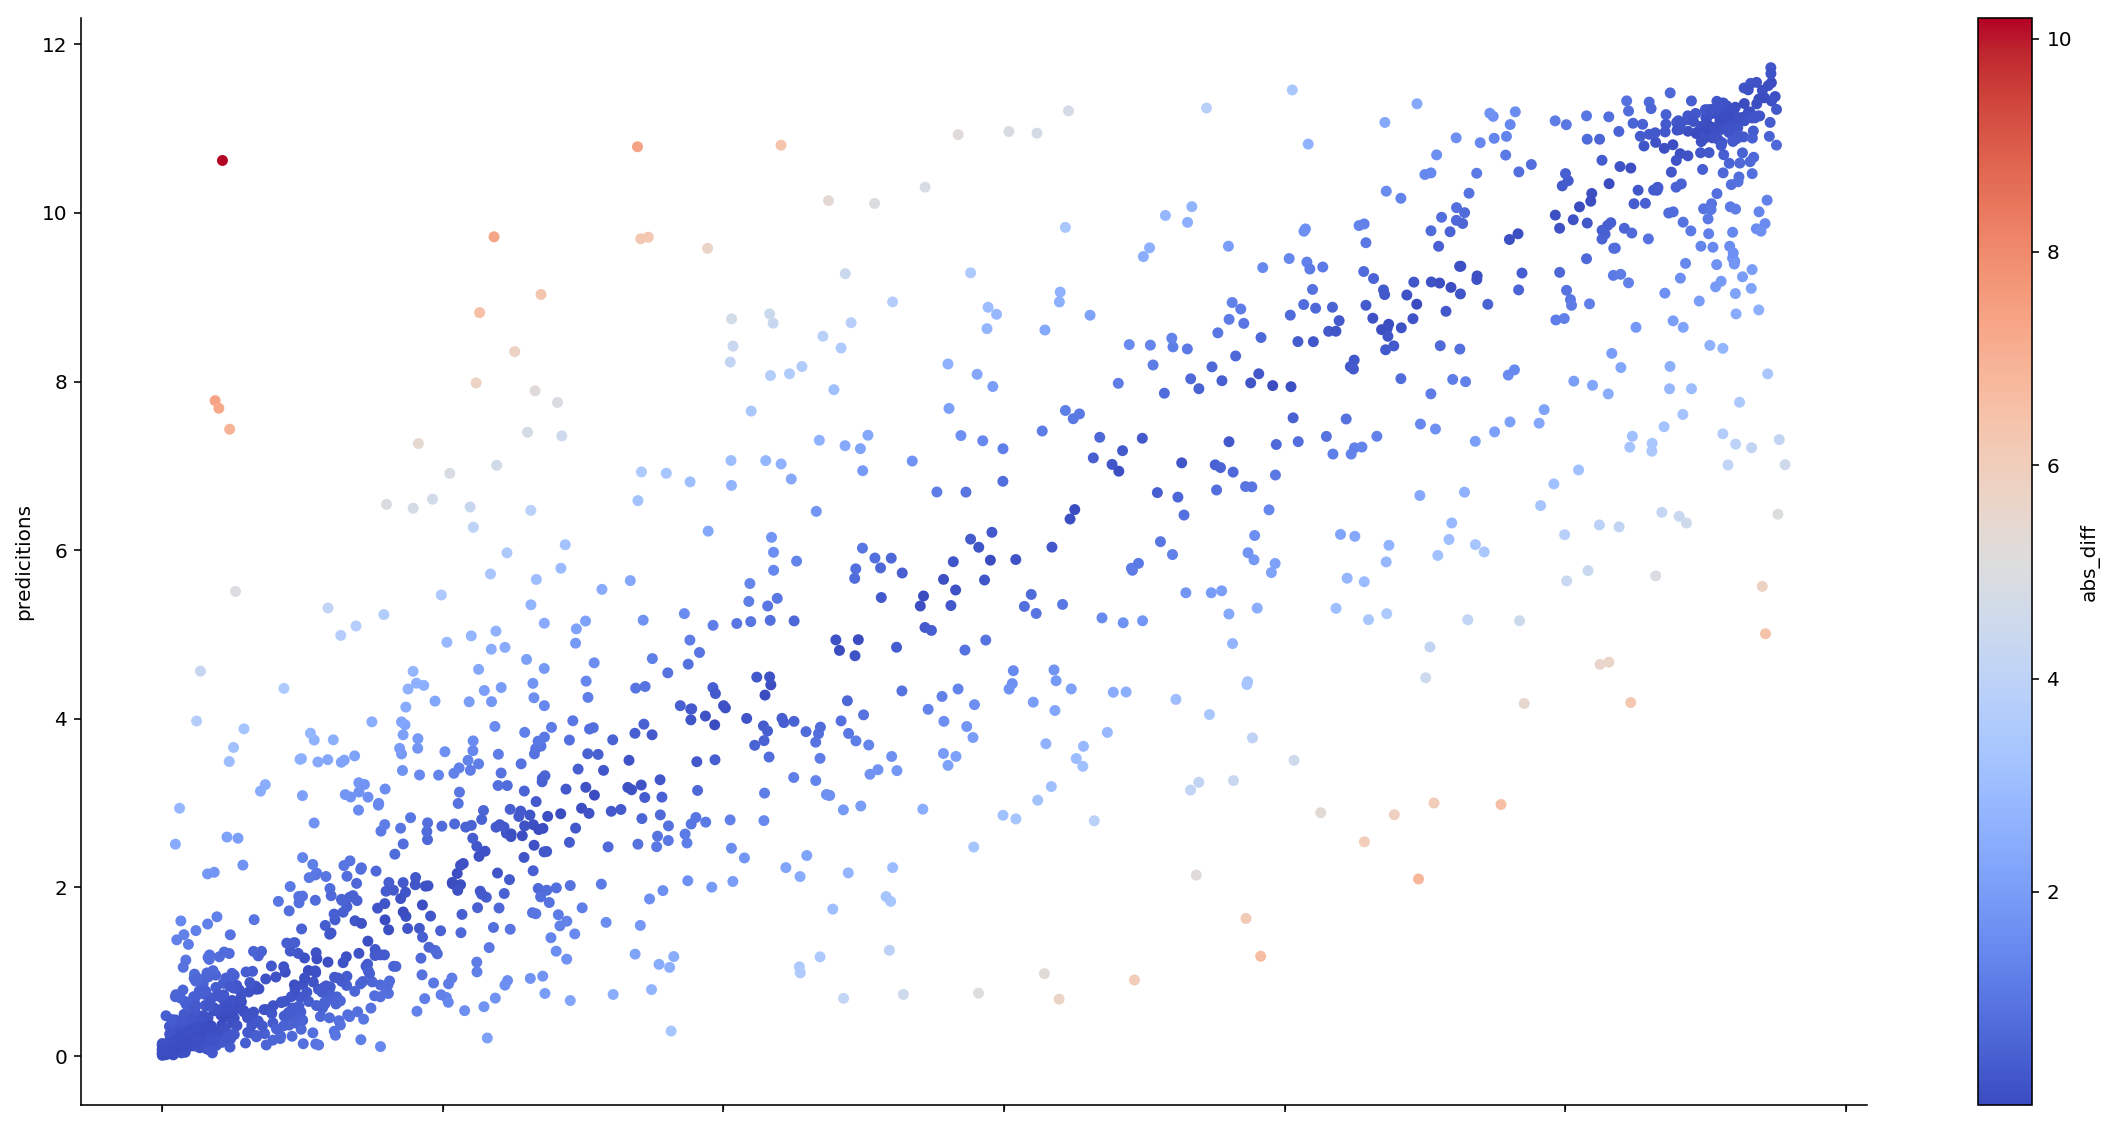

In [29]:
ax = Oversikt.plot.scatter(x='real',y='predicitions',
                   c='abs_diff',cmap='coolwarm', figsize = (20,10))

ax.set_xlabel("x label")

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig = ax.get_figure()
#fig.savefig('keras_model.png')

### Feilfordelingen av prediksjoner

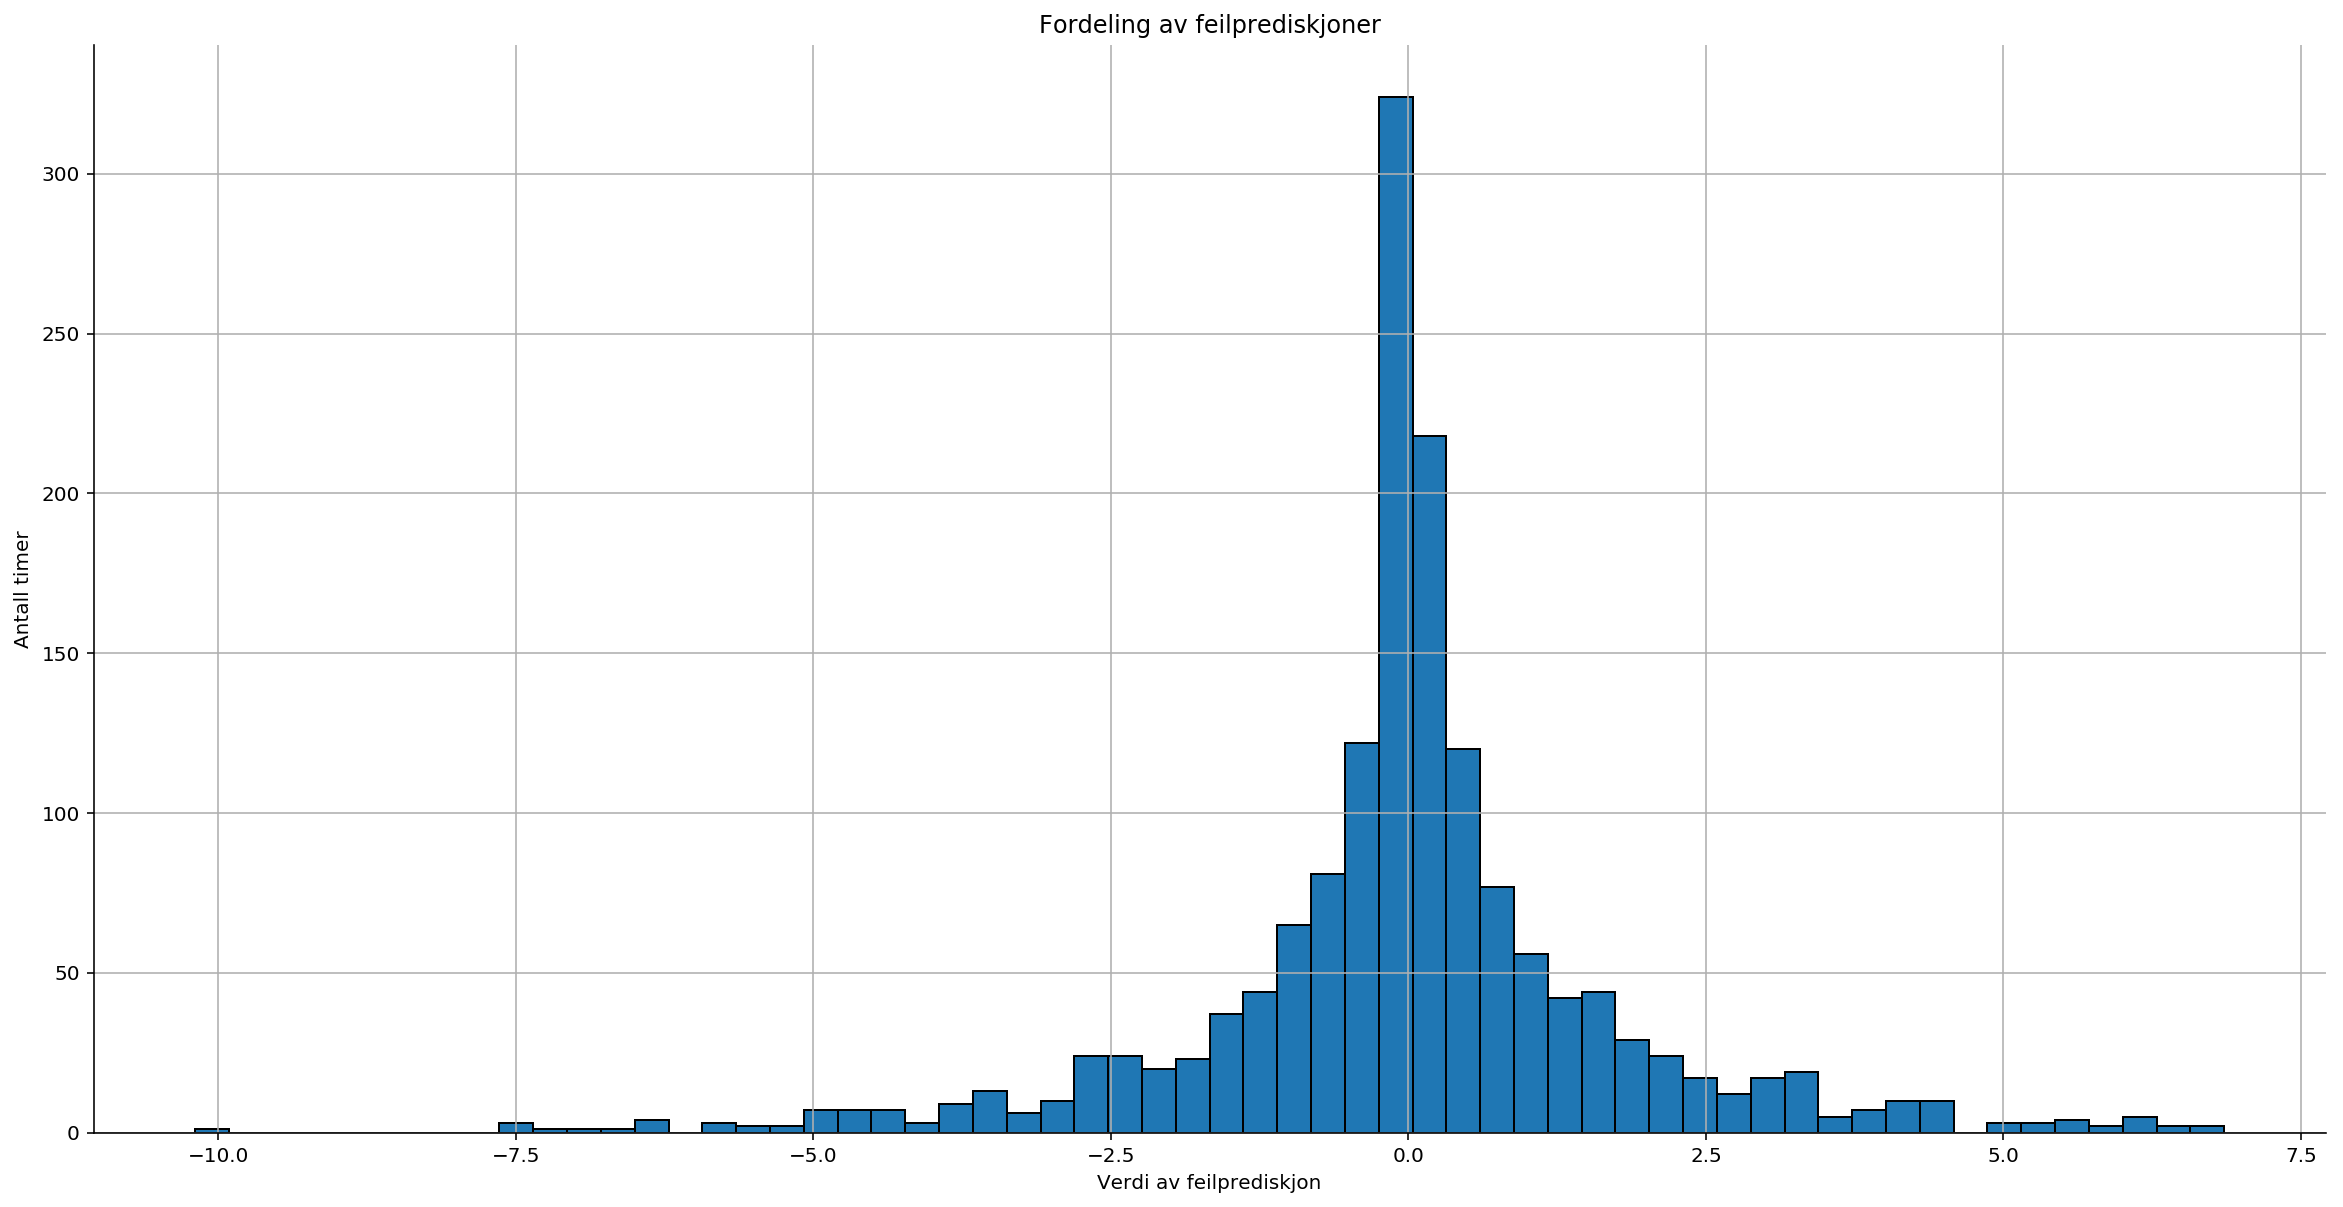

In [30]:
ax = Oversikt['differanse'].hist(bins=60,figsize = (20,10))

plt.xlabel('Verdi av feilprediskjon')
plt.ylabel('Antall timer')
plt.title('Fordeling av feilprediskjoner')

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig = ax.get_figure()
#fig.savefig('hist av abs.png')

# Ekte plott av prediksjonene

#### Forsøk på å hente ut et utdrag av dataen

In [31]:
all_predictions = finished_model.predict(x[:,:])

predictions_all = list(all_predictions)

predictions_all_list = []

for pred in predictions_all:
    predictions_all_list.append(pred[0])
    
timeline = pd.DataFrame(data = {'real': y[:], 'predicitions': predictions_all_list})

# Adjust in order to plot 'dagens modell'
data_raw.dropna(inplace=True)
data_raw.reset_index(inplace=True)

#### Tidsplot av data

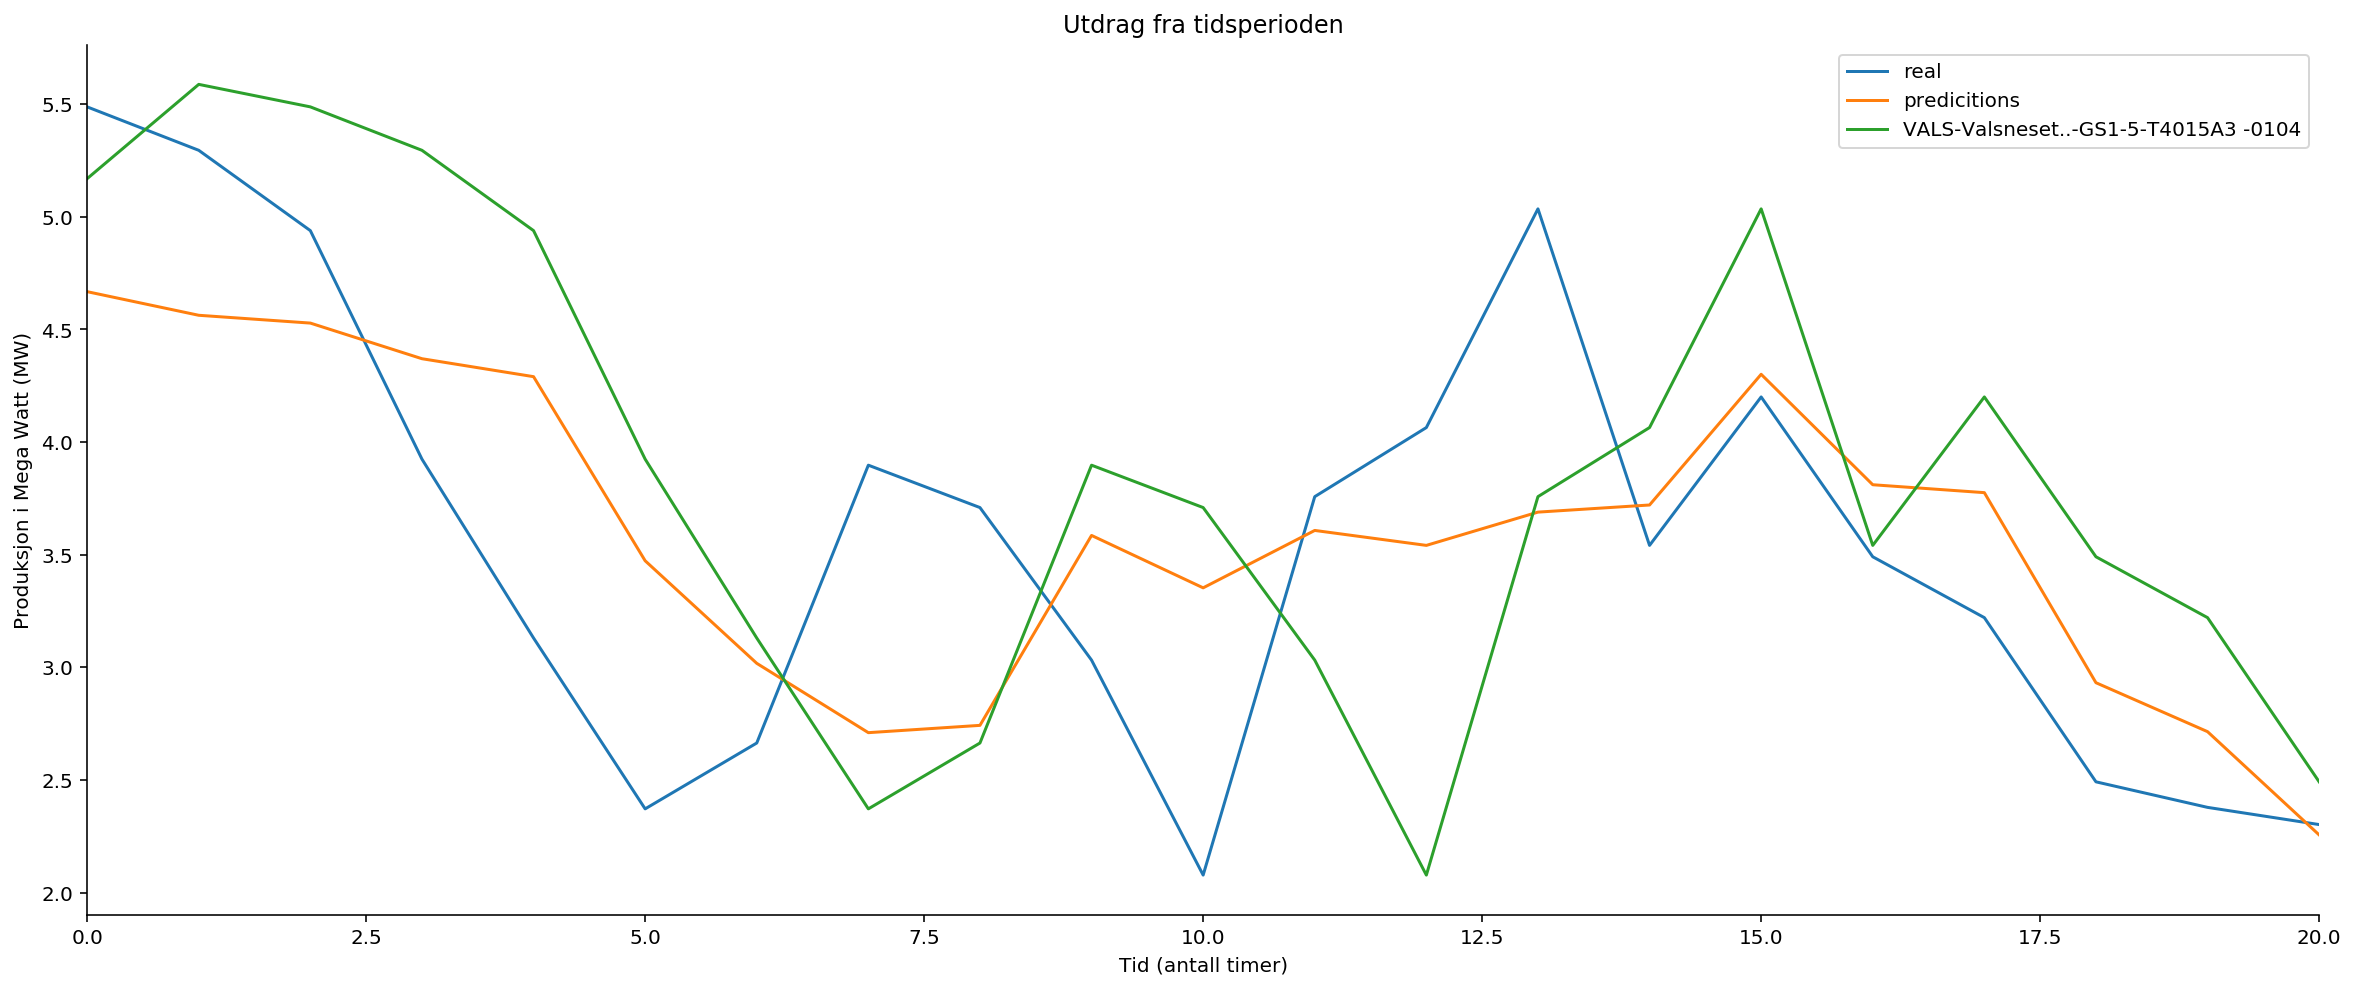

In [33]:
# Justere tidslinjen på plottet
start = 0
slutt = 20

ax = timeline.loc[start:slutt,'real'].plot(figsize=(20,8))
ax = timeline.loc[start:slutt,'predicitions'].plot(figsize=(20,8))
ax = data_raw.loc[start:slutt,'VALS-Valsneset..-GS1-5-T4015A3 -0104'].plot(figsize=(20,8))

 
plt.xlabel('Tid (antall timer)')
plt.ylabel('Produksjon i Mega Watt (MW)')
plt.title('Utdrag fra tidsperioden')

plt.legend(loc='best')

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Saves figure
fig = ax.get_figure()
#fig.savefig('september10.png')